In [130]:
# Impotación de liberiaas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File paths
data_path = '../data/covid_data.csv'
data_fr = pd.read_csv(data_path)
data_fr.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
0,Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
1,Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
2,Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
3,Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
4,Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284


In [3]:
#Utilizar función melt para pasar dejar a country y sate como columnas y las fechas y los datos pasar de filas a columnas
data_fr=pd.melt(data_fr, id_vars=['Country', 'State'], var_name='Date', value_name='cases_deaths')

In [4]:
data_fr

,Country,State,Date,cases_deaths
0,Afghanistan,NaN,1/22/20,0 0
1,Albania,NaN,1/22/20,0 0
2,Algeria,NaN,1/22/20,0 0
3,Andorra,NaN,1/22/20,0 0
4,Angola,NaN,1/22/20,0 0
...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520 483
92296,Western Sahara,NaN,10/31/20,10 1
92297,Yemen,NaN,10/31/20,2063 599
92298,Zambia,NaN,10/31/20,16432 349


In [17]:
#Separar casos y muertes en columnas diferentes
separated_df = data_fr["cases_deaths"].str.split(expand=True)
separated_df.columns = ['Casos', 'Muertes']
data_fr['Casos']=separated_df['Casos']
data_fr['Muertes']=separated_df['Muertes']
data_fr

,Country,State,Date,cases_deaths,Casos,Muertes
0,Afghanistan,NaN,1/22/20,0 0,0,0
1,Albania,NaN,1/22/20,0 0,0,0
2,Algeria,NaN,1/22/20,0 0,0,0
3,Andorra,NaN,1/22/20,0 0,0,0
4,Angola,NaN,1/22/20,0 0,0,0
...,...,...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520 483,53520,483
92296,Western Sahara,NaN,10/31/20,10 1,10,1
92297,Yemen,NaN,10/31/20,2063 599,2063,599
92298,Zambia,NaN,10/31/20,16432 349,16432,349


In [56]:
#Eliminar columna cases_deaths
dataReady=data_fr.drop(['cases_deaths'], axis=1)
dataReady

,Country,State,Date,Casos,Muertes
0,Afghanistan,NaN,1/22/20,0,0
1,Albania,NaN,1/22/20,0,0
2,Algeria,NaN,1/22/20,0,0
3,Andorra,NaN,1/22/20,0,0
4,Angola,NaN,1/22/20,0,0
...,...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520,483
92296,Western Sahara,NaN,10/31/20,10,1
92297,Yemen,NaN,10/31/20,2063,599
92298,Zambia,NaN,10/31/20,16432,349


In [57]:
dataReady.dtypes

Country    object
State      object
Date       object
Casos      object
Muertes    object
dtype: object

In [25]:
dataReady.loc[108][0]

'Ecuador'

In [27]:
dataReady.loc[205][0]

'Peru'

In [28]:
dataReady.loc[92][0]

'Colombia'

In [62]:
#Conversión de Object a diferentes tipos
dataReady['Casos']= dataReady['Casos'].astype('int')
dataReady['Muertes']= dataReady['Muertes'].astype('int')
dataReady['Date']=pd.to_datetime(dataReady['Date'])

In [63]:
dataReady.dtypes

Country            object
State              object
Date       datetime64[ns]
Casos               int32
Muertes             int32
dtype: object

In [126]:
dataReady


,Country,State,Date,Casos,Muertes
0,Afghanistan,NaN,2020-01-22,0,0
1,Albania,NaN,2020-01-22,0,0
2,Algeria,NaN,2020-01-22,0,0
3,Andorra,NaN,2020-01-22,0,0
4,Angola,NaN,2020-01-22,0,0
...,...,...,...,...,...
92295,West Bank and Gaza,NaN,2020-10-31,53520,483
92296,Western Sahara,NaN,2020-10-31,10,1
92297,Yemen,NaN,2020-10-31,2063,599
92298,Zambia,NaN,2020-10-31,16432,349


In [135]:
dataReady.iloc[1:,4]  

1          0
2          0
3          0
4          0
5          0
        ... 
92295    483
92296      1
92297    599
92298    349
92299    243
Name: Muertes, Length: 92299, dtype: int32

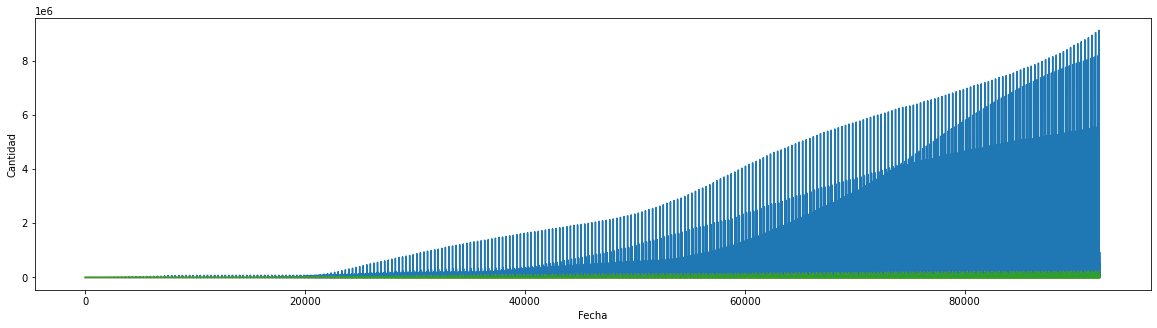

In [140]:
fig = plt.figure(figsize = (20,5))

lista1 = dataReady.iloc[1:,3]   # Declara lista1 los casos de covid
plt.plot(lista1, label="Casos")   # Dibuja el gráfico
plt.xlabel("Fecha")   # Inserta el título del eje X
plt.ylabel("Cantidad")   # Inserta el título del eje Y
#plt.ioff()   # Desactiva modo interactivo de dibujo
lista2 = dataReady.iloc[1:,4]    # Declara lista2 declara muertes por covid
plt.plot(lista2, label="Muertes")   # No dibuja datos de lista2
#plt.ion()   # Activa modo interactivo de dibujo
plt.plot(lista2)   # Dibuja datos de lista2 sin borrar datos de lista1